In [72]:
# Set Paths
train_dir = "/home/hice1/pwang393/scratch/test5/training_set"
test_dir = "/home/hice1/pwang393/scratch/test5/test_set"
train_dir, test_dir

('/home/hice1/pwang393/scratch/test5/training_set',
 '/home/hice1/pwang393/scratch/test5/test_set')

In [73]:
# Image Preprocessing
from SVM_helper import load_image_data

x_train, y_train = load_image_data(train_dir)
x_test, y_test = load_image_data(test_dir)

Processing images: 100%|██████████| 340/340 [00:22<00:00, 15.07it/s]


In [74]:
# Check if loaded
print(f"Training set size: {len(x_train)} images")
print(f"Testing set size: {len(x_test)} images")

Training set size: 1356 images
Testing set size: 340 images


In [75]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.decomposition import IncrementalPCA, PCA
from sklearn.feature_selection import VarianceThreshold

pipeline = Pipeline([
    ('scaler', MinMaxScaler()),
    ('feature_selection', VarianceThreshold(0.005)),
    ('pca', PCA(n_components=.95))
])

x_train = pipeline.fit_transform(x_train)
x_test = pipeline.transform(x_test)

In [76]:
from sklearn.svm import LinearSVC
svm_model = LinearSVC(C=1, random_state=42)
svm_model.fit(x_train, y_train)
y_pred = svm_model.predict(x_test)


from sklearn.metrics import accuracy_score, classification_report
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))

Accuracy: 0.64
              precision    recall  f1-score   support

           0       0.68      0.63      0.66       183
           1       0.60      0.66      0.63       157

    accuracy                           0.64       340
   macro avg       0.64      0.65      0.64       340
weighted avg       0.65      0.64      0.64       340



In [77]:
from sklearn.svm import SVC
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(x_train, y_train)
y_pred_rbf = svm_rbf.predict(x_test)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel Accuracy: {accuracy_rbf:.2f}")
print(classification_report(y_test, y_pred_rbf))


Training SVM with rbf kernel...
RBF Kernel Accuracy: 0.71
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       183
           1       0.68      0.69      0.69       157

    accuracy                           0.71       340
   macro avg       0.70      0.71      0.70       340
weighted avg       0.71      0.71      0.71       340



In [78]:
svm_poly = SVC(kernel='poly', C=1, degree=5, gamma='auto') 
svm_poly.fit(x_train, y_train)
y_pred_poly = svm_poly.predict(x_test)

accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel Accuracy: {accuracy_poly:.2f}")
print(classification_report(y_test, y_pred_poly))



Training SVM with polynomial kernel...
Polynomial Kernel Accuracy: 0.61
              precision    recall  f1-score   support

           0       0.63      0.67      0.65       183
           1       0.59      0.54      0.56       157

    accuracy                           0.61       340
   macro avg       0.61      0.61      0.61       340
weighted avg       0.61      0.61      0.61       340



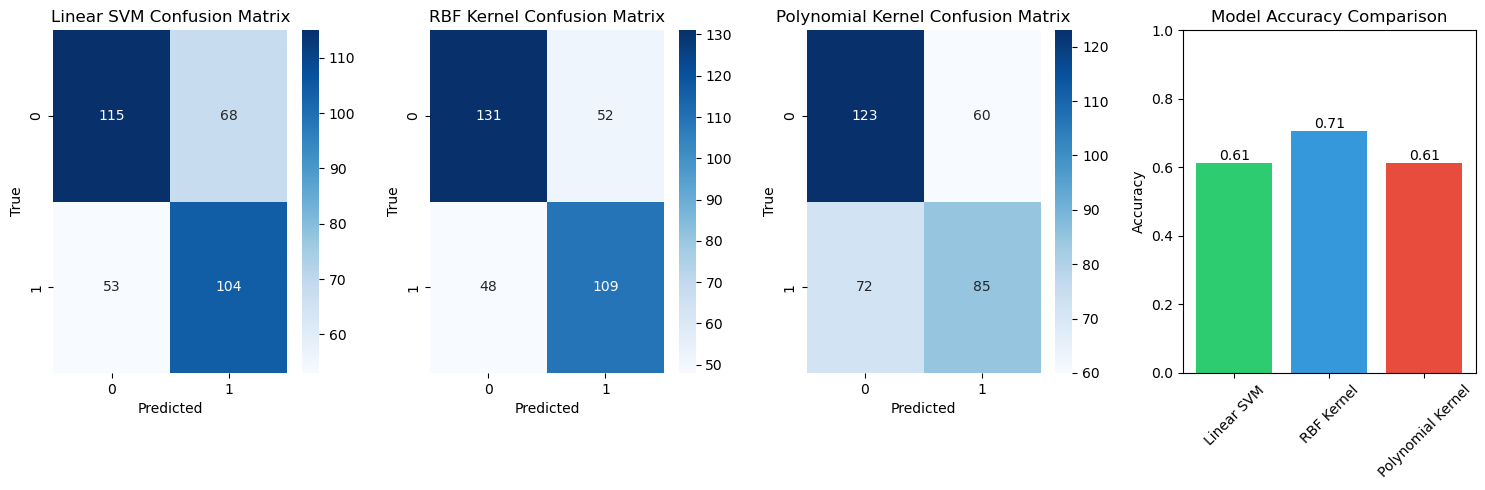

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score

plt.figure(figsize=(15, 5))


for idx, (title, y_pred) in enumerate([
    ('Linear SVM', y_pred),
    ('RBF Kernel', y_pred_rbf),
    ('Polynomial Kernel', y_pred_poly)
]):

    ax = plt.subplot(1, 4, idx + 1)
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')

ax = plt.subplot(1, 4, 4)
accuracies = [
    accuracy_score(y_test, y_pred),
    accuracy_score(y_test, y_pred_rbf),
    accuracy_score(y_test, y_pred_poly)
]

models = ['Linear SVM', 'RBF Kernel', 'Polynomial Kernel']
bars = plt.bar(models, accuracies, color=['#2ecc71', '#3498db', '#e74c3c'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.2f}',
             ha='center', va='bottom')

plt.tight_layout()
plt.show()